<a href="https://colab.research.google.com/github/Mayank-004/VC-Industry-Predictive-analysis/blob/main/Exit_Size_(NEW).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# imort modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from xgboost.sklearn import XGBRegressor
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder

# Load data

In [ ]:
path1 = 'https://raw.githubusercontent.com/Carloszone/ALY-6080/main/NE%20%20VC%20Backed%20Exits%20DevOps%20(VC%20Exits).csv'
path2 = 'https://raw.githubusercontent.com/Carloszone/ALY-6080/main/NE%20%20VC%20Backed%20Exits%20DevOps%20(return%20by%20series).csv'
path3 = 'https://raw.githubusercontent.com/Carloszone/ALY-6080/main/NE%20Devops%20dataset%20all-fields.csv'

df_vc = pd.read_csv(path1)
df_return = pd.read_csv(path2)
df_all = pd.read_csv(path3)



In [ ]:
# rename the CompanyID in df_all
df_all = df_all.rename(columns={"Company ID": "Company PBID"})

# Data processing

In [ ]:
# remove all NA in column Company PBID
df_vc = df_vc.dropna(subset = ['Company PBID'])
df_return = df_return.dropna(subset = ['Company PBID'])
df_all = df_all.dropna(subset = ['Company PBID'])

In [ ]:
# remove the addiditonal signal for all availiavle values in df_vc
df_vc['MOIC'][df_vc['MOIC'].notna()] = df_vc['MOIC'][df_vc['MOIC'].notna()].str.replace("x","")
df_vc['Exit Size (millions)'][df_vc['Exit Size (millions)'].notna()] = df_vc['Exit Size (millions)'][df_vc['Exit Size (millions)'].notna()].str.replace("$","")
df_vc['Pre Value (millions)'][df_vc['Pre Value (millions)'].notna()] = df_vc['Pre Value (millions)'][df_vc['Pre Value (millions)'].notna()].str.replace("$","")
df_vc['Post Value (millions)'][df_vc['Post Value (millions)'].notna()] = df_vc['Post Value (millions)'][df_vc['Post Value (millions)'].notna()].str.replace("$","")
df_vc['Total VC Capital Raised ($M)***'][df_vc['Total VC Capital Raised ($M)***'].notna()] = df_vc['Total VC Capital Raised ($M)***'][df_vc['Total VC Capital Raised ($M)***'].notna()].str.replace("$","")
df_vc['Total Preferred Capital Raised ($M)*'][df_vc['Total Preferred Capital Raised ($M)*'].notna()] = df_vc['Total Preferred Capital Raised ($M)*'][df_vc['Total Preferred Capital Raised ($M)*'].notna()].str.replace("$","")
df_vc['Total Preferred Capital Raised ($M) - Combination**'][df_vc['Total Preferred Capital Raised ($M) - Combination**'].notna()] = df_vc['Total Preferred Capital Raised ($M) - Combination**'][df_vc['Total Preferred Capital Raised ($M) - Combination**'].notna()].str.replace("$","")

df_vc['Exit Size (millions)'][df_vc['Exit Size (millions)'].notna()] = df_vc['Exit Size (millions)'][df_vc['Exit Size (millions)'].notna()].str.replace(",","")
df_vc['Pre Value (millions)'][df_vc['Pre Value (millions)'].notna()] = df_vc['Pre Value (millions)'][df_vc['Pre Value (millions)'].notna()].str.replace(",","")
df_vc['Post Value (millions)'][df_vc['Post Value (millions)'].notna()] = df_vc['Post Value (millions)'][df_vc['Post Value (millions)'].notna()].str.replace(",","")
df_vc['Total VC Capital Raised ($M)***'][df_vc['Total VC Capital Raised ($M)***'].notna()] = df_vc['Total VC Capital Raised ($M)***'][df_vc['Total VC Capital Raised ($M)***'].notna()].str.replace(",","")
df_vc['Total Preferred Capital Raised ($M)*'][df_vc['Total Preferred Capital Raised ($M)*'].notna()] = df_vc['Total Preferred Capital Raised ($M)*'][df_vc['Total Preferred Capital Raised ($M)*'].notna()].str.replace(",","")
df_vc['Total Preferred Capital Raised ($M) - Combination**'][df_vc['Total Preferred Capital Raised ($M) - Combination**'].notna()] = df_vc['Total Preferred Capital Raised ($M) - Combination**'][df_vc['Total Preferred Capital Raised ($M) - Combination**'].notna()].str.replace(",","")

df_vc['% Preferred Capital Raised*'][df_vc['% Preferred Capital Raised*'].notna()] = df_vc['% Preferred Capital Raised*'][df_vc['% Preferred Capital Raised*'].notna()].str.replace("%","")
df_vc['% Preferred Capital Raised - Combination**'][df_vc['% Preferred Capital Raised - Combination**'].notna()] = df_vc['% Preferred Capital Raised - Combination**'][df_vc['% Preferred Capital Raised - Combination**'].notna()].str.replace("%","")

In [ ]:
# # remove the addiditonal signal for all availiavle values in df_all
df_all['Raised to Date'] = df_all['Raised to Date'].str.replace(",","")
df_all['Current Employees'] = df_all['Current Employees'].str.replace(",","")


In [ ]:
# transform data type in df_vc
df_vc.loc[:,'Exit Size (millions)'] = df_vc.loc[:,'Exit Size (millions)'].astype(float)
df_vc.loc[:,'Pre Value (millions)'] = df_vc.loc[:,'Pre Value (millions)'].astype(float)
df_vc.loc[:,'Post Value (millions)'] = df_vc.loc[:,'Post Value (millions)'].astype(float)
df_vc.loc[:,'Total VC Capital Raised ($M)***'] = df_vc.loc[:,'Total VC Capital Raised ($M)***'].astype(float)
df_vc.loc[:,'Total Preferred Capital Raised ($M)*'] = df_vc.loc[:,'Total Preferred Capital Raised ($M)*'].astype(float)
df_vc.loc[:,'% Preferred Capital Raised*'] = df_vc.loc[:,'% Preferred Capital Raised*'].astype(float)
df_vc.loc[:,'Total Preferred Capital Raised ($M) - Combination**'] = df_vc.loc[:,'Total Preferred Capital Raised ($M) - Combination**'].astype(float)
df_vc.loc[:,'% Preferred Capital Raised - Combination**'] = df_vc.loc[:,'% Preferred Capital Raised - Combination**'].astype(float)
df_vc.loc[:,'MOIC'] = df_vc.loc[:,'MOIC'].astype(float)

In [ ]:
# transform data type in df_all
df_all.loc[:,'Raised to Date'] = df_all.loc[:,'Raised to Date'].astype(float)
df_all.loc[:,'Current Employees'] = df_all.loc[:,'Current Employees'].astype(float)


# merge datasets and create a new df

In [ ]:
# merge dataset
df = df_all.merge(df_vc.loc[df_vc['Exit Size (millions)'].notna(),:], how = 'inner', on = 'Company PBID')

In [ ]:
# set exit size as the first columns
newcol = df['Exit Size (millions)']
df = df.drop('Exit Size (millions)', axis = 1)
df.insert(loc=0, column='Exit Size', value=newcol)


In [ ]:
# locate and drop all columns that missing value percent >30%
# check missing value in df
missing = df.isna().sum().sort_values(ascending = False)
percent_missing = ((missing / df.isnull().count()) * 100).sort_values(ascending = False)
missing_df = pd.concat([missing,percent_missing], axis = 1, keys = ['Total', 'Percent'],sort = False)
missing_df = missing_df.reset_index()
over30 = list(missing_df.loc[missing_df['Percent'] >= 30,'index'])

In [ ]:
# drop all columns that missing value percent is over 30%
df = df.drop(over30, axis = 1)

In [ ]:
df.info

<bound method DataFrame.info of      Exit Size     Deal ID Company PBID Primary Industry Sector  \
0       166.00   46035-10T     81857-08  Information Technology   
1        14.10   86566-96T    179890-84  Information Technology   
2        14.10   86567-86T    179890-84  Information Technology   
3        14.10   86568-58T    179890-84  Information Technology   
4        14.10   86569-48T    179890-84  Information Technology   
..         ...         ...          ...                     ...   
154   12395.10  121347-82T     51156-64  Information Technology   
155      40.00  109319-59T     42855-04  Information Technology   
156      40.00   35583-94T     42855-04  Information Technology   
157    8873.17   81215-92T     56017-63  Information Technology   
158    8873.17   44245-45T     56017-63  Information Technology   

    Primary Industry Group           Primary Industry Code  \
0                 Software  Business/Productivity Software   
1                 Software            A

In [ ]:
df.columns

Index(['Exit Size', 'Deal ID', 'Company PBID', 'Primary Industry Sector',
       'Primary Industry Group', 'Primary Industry Code', 'All Industries',
       'Verticals_x', 'Keywords', 'Current Financing Status',
       'Current Business Status', 'Universe', 'CEO PBId', 'CEO Education',
       'Deal No.', 'Deal ID.1', 'Deal Date', 'Deal Size', 'Deal Size Status',
       'Raised to Date', 'VC Round', 'Deal Type', 'Deal Type 2', 'Deal Class',
       'Total Invested Equity', 'Deal Status', 'Business Status',
       'Financing Status', '# Investors', '# New Investors',
       'Current Employees', 'Native Currency of Deal', 'HQ Location',
       'HQ Global Region', 'HQ Global Sub Region', 'Company City',
       'Company State/Province', 'Company Post Code', 'Company Country',
       'Year Founded', 'Exit Date', 'Post Value (millions)', 'Exit Type',
       'Last VC Deal Type', 'Total VC Capital Raised ($M)***',
       'Industry Sector', 'Industry Group', 'Industry Code', 'Verticals_y',
      

In [ ]:
# based on unqie value table, drop columns
droplist = ['Deal ID', 'Company PBID', 'Primary Industry Code', 'All Industries', 'Keywords', 
            'CEO PBId', 'Deal ID.1', 'Deal Status', 'HQ Location', 'Company City','Company State/Province', 
            'Company Post Code', 'Industry Code', 'Verticals_y', 'City', 'State', 'Deal Type 2', 'VC Round']

# drop columns
df = df.drop(droplist, axis = 1)

In [ ]:
df.columns

Index(['Exit Size', 'Primary Industry Sector', 'Primary Industry Group',
       'Verticals_x', 'Current Financing Status', 'Current Business Status',
       'Universe', 'CEO Education', 'Deal No.', 'Deal Date', 'Deal Size',
       'Deal Size Status', 'Raised to Date', 'Deal Type', 'Deal Class',
       'Total Invested Equity', 'Business Status', 'Financing Status',
       '# Investors', '# New Investors', 'Current Employees',
       'Native Currency of Deal', 'HQ Global Region', 'HQ Global Sub Region',
       'Company Country', 'Year Founded', 'Exit Date', 'Post Value (millions)',
       'Exit Type', 'Last VC Deal Type', 'Total VC Capital Raised ($M)***',
       'Industry Sector', 'Industry Group', 'Country'],
      dtype='object')

# Data processing: Fill missing value

In [ ]:
# check missing value in df
missing = df.isna().sum().sort_values(ascending = False)
percent_missing = ((missing / df.isnull().count()) * 100).sort_values(ascending = False)
missing_df = pd.concat([missing,percent_missing], axis = 1, keys = ['Total', 'Percent'],sort = False)
missing_df[missing_df['Total'] >= 1]

,Total,Percent
Total Invested Equity,34,21.383648
Deal Size Status,29,18.238994
Deal Size,29,18.238994
# New Investors,27,16.981132
CEO Education,27,16.981132
# Investors,21,13.207547
Current Employees,20,12.578616
Raised to Date,8,5.031447
Post Value (millions),6,3.773585
Total VC Capital Raised ($M)***,4,2.515723


In [ ]:
# fill missing values
df['Total Invested Equity'] = df['Total Invested Equity'].fillna(df['Total Invested Equity'].mean())
df['Deal Size Status'] = df['Deal Size Status'].fillna('Missing')
df['Deal Size'] = df['Deal Size'].fillna(df['Deal Size'].mean())
df['CEO Education'] = df['CEO Education'].fillna('O')
df['# New Investors'] = df['# New Investors'].fillna(int(df['# New Investors'].mean()))
df['# Investors'] = df['# Investors'].fillna(int(df['# Investors'].mean()))
df['Current Employees'] = df['Current Employees'].fillna(int(df['Current Employees'].mean()))

df['Raised to Date'] = df['Raised to Date'].fillna(df['Raised to Date'].mean())
df['Post Value (millions)'] = df['Post Value (millions)'].fillna(df['Post Value (millions)'].mean())
df['Total VC Capital Raised ($M)***'] = df['Total VC Capital Raised ($M)***'].fillna(df['Total VC Capital Raised ($M)***'].mean())
df['Year Founded'] = df['Year Founded'].fillna(2013)
df['Last VC Deal Type'] = df['Last VC Deal Type'].apply(lambda x: "Series A" if( "Series A" in x or 'Series 1' in x) else 
                                                       "Series B" if ("Series B" in x or "Series 2" in x) else
                                                       "Series C" if "Series C" in x else
                                                       "Series D" if "Series D" in x else
                                                       "Series E" if "Series E" in x else x)

# Data processinig: Data fransform

In [ ]:
#transform "CEO Eduction"
df['CEO Education'] = df['CEO Education'].apply(lambda x: 3 if "Doctor" in x else \
                                               2 if "Master" in x else \
                                               1 if "Bachelor" in x else 0)
#transform "Deal Date"
df['Deal Date'] = df['Deal Date'].str.extract(pat='([0-9]+$)')
df.loc[:,'Deal Date'] = df.loc[:,'Deal Date'].astype(float)
#transform "Exit Date"
df['Exit Date'] = df['Exit Date'].str.extract(pat='^([0-9]+)')

df['CompanyAge'] = 2021 - df['Year Founded']


In [ ]:
df = df.drop(['Native Currency of Deal', 'Deal Date','Year Founded'],axis = 1)

In [ ]:
df.head()

,Exit Size,Primary Industry Sector,Primary Industry Group,Verticals_x,Current Financing Status,Current Business Status,Universe,CEO Education,Deal No.,Deal Size,...,Company Country,Exit Date,Post Value (millions),Exit Type,Last VC Deal Type,Total VC Capital Raised ($M)***,Industry Sector,Industry Group,Country,CompanyAge
0,166.0,Information Technology,Software,"CloudTech & DevOps, SaaS",Formerly VC-backed,Generating Revenue,Venture Capital,2,1,10.100000,...,United States,2019,166.0,Merger/Acquisition,Early Stage VC,10.100000,Information Technology,Software,United States,8.0
1,14.1,Information Technology,Software,"Big Data, CloudTech & DevOps, Industrials, Int...",Formerly VC-backed,Generating Revenue,Venture Capital,2,1,0.070000,...,Canada,2018,14.1,Merger/Acquisition,Early Stage VC,236.812516,Information Technology,Software,Canada,6.0
2,14.1,Information Technology,Software,"Big Data, CloudTech & DevOps, Industrials, Int...",Formerly VC-backed,Generating Revenue,Venture Capital,2,2,62.619462,...,Canada,2018,14.1,Merger/Acquisition,Early Stage VC,236.812516,Information Technology,Software,Canada,6.0
3,14.1,Information Technology,Software,"Big Data, CloudTech & DevOps, Industrials, Int...",Formerly VC-backed,Generating Revenue,Venture Capital,2,3,0.100000,...,Canada,2018,14.1,Merger/Acquisition,Early Stage VC,236.812516,Information Technology,Software,Canada,6.0
4,14.1,Information Technology,Software,"Big Data, CloudTech & DevOps, Industrials, Int...",Formerly VC-backed,Generating Revenue,Venture Capital,2,4,62.619462,...,Canada,2018,14.1,Merger/Acquisition,Early Stage VC,236.812516,Information Technology,Software,Canada,6.0


# EDA 

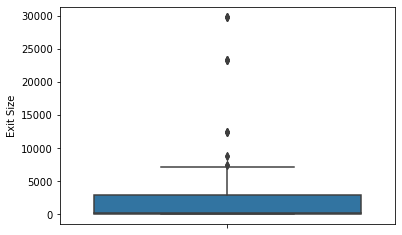

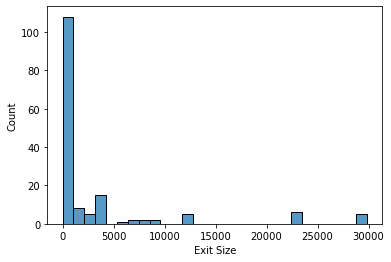

In [ ]:
# check MOIC's distribution
sn.boxplot(y=df["Exit Size"])
plt.show()
sn.histplot(df, x ='Exit Size')
plt.show()

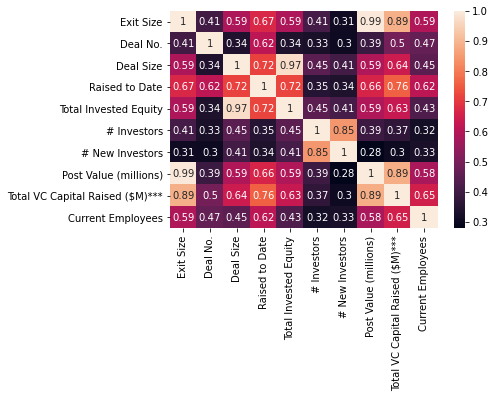

In [ ]:
# create correlation metrix
corrMatrix = df.loc[:,['Exit Size', 'Deal No.', 'Deal Size', 'Raised to Date', 'Total Invested Equity', '# Investors', 
                       '# New Investors', 'Post Value (millions)', 'Total VC Capital Raised ($M)***', 'Current Employees']].corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
# drop 'Total VC Capital Raised ($M)***','# New Investors'，'# Investors','Deal No.' baaed on corr matrix (collinearity)
df = df.drop(['Post Value (millions)', '# New Investors','# Investors','Deal No.'], axis = 1)

# drop outliers
df = df.loc[df['Exit Size']<15000,:].reset_index(drop=True)

In [ ]:
#new = pd.DataFrame({
#    'feature':df.columns,
#    'data type':df.dtypes
#})
#categorical = list(new.loc[new['data type'] == "object", 'feature'])

# Feature engineering

In [ ]:
def generate_features(data):
    le= LabelEncoder()
    data = data.loc[:,['Exit Size', 'Primary Industry Sector', 'Current Employees', 'Country', 'CompanyAge', 'Last VC Deal Type',
                                    'Total VC Capital Raised ($M)***',]]
    data['Primary Industry Sector'] = le.fit_transform(data['Primary Industry Sector'])
    data['Last VC Deal Type'] = le.fit_transform(data['Last VC Deal Type'])
    data['Country'] = le.fit_transform(data['Country'])
    return(data)

In [ ]:
df = generate_features(df)

In [ ]:
def error(y_true, y_pred):
    pred_err_squared = mean_squared_error(y_true,y_pred,squared = 1, multioutput = 'raw_values')
    total_err_squared = (y_true - np.mean(y_true)) ** 2
    return(np.sqrt(np.sum(pred_err_squared)/np.sum(total_err_squared))*100)

In [ ]:
def scores(model_list,train_x, train_y, test_x, test_y):
    model_names = []
    train_score = []
    model_score = []
    train_mse = []
    model_mse = []
    train_mae = []
    model_mae = []
    train_error = []
    test_error = []
    train_x = np.array(train_x)
    train_y = np.array(train_y)
    test_x = np.array(test_x)
    test_y = np.array(test_y)

    for model in model_list:
        model.fit(train_x, train_y)
        model_names.append(model)
        train_score.append(model.score(train_x, train_y))
        model_score.append(model.score(test_x, test_y))
        train_mse.append(mean_squared_error(train_y,model.predict(train_x),squared = 1))
        model_mse.append(mean_squared_error(test_y,model.predict(test_x),squared = 1))
        train_mae.append(mean_absolute_error(train_y, model.predict(train_x)))
        model_mae.append(mean_absolute_error(test_y, model.predict(test_x)))
        train_error.append(error(train_y,model.predict(train_x)))
        test_error.append(error(test_y,model.predict(test_x)))
    result = pd.DataFrame({'Name':model_names, 'Train_R^2': train_score, 'Test_R^2':model_score, 'Train_RMSE':train_mse,
                           'Test_RMSE':model_mse, 'Train_MAE':train_mae, 'Test_MAE':model_mae, 'Train_ERR':train_error,
                          'Test_ERR':test_error})
    return result

In [ ]:
X = df.iloc[:, 1:]

Y = df.iloc[:, 0:1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2021)

# model selection

In [ ]:
# def grid_search(x, y, model, parameters, cv):
#    x = np.array(x)
#    y = np.array(y)
#    search_rf = GridSearchCV(estimator = model,
#                             param_grid = parameters, 
#                             cv = cv,
#                             n_jobs = -1,
#                             verbose = 2)
#    search_rf.fit(x, y)
#    grid_result = search_rf.best_params_
#    return  grid_result

In [ ]:
# build model with the best parameters
model_lr = LinearRegression()
model_ridge = Ridge(solver = 'sparse_cg')
model_xgb = XGBRegressor(n_estimators= 10, max_depth = 4, random_state = 2021)
model_lasso = Lasso(random_state = 2021)
model_en = ElasticNet()
model_rf = RandomForestRegressor(n_estimators = 100, max_features = 2, random_state = 2021)

In [ ]:
# grid search for xgb
#grid_xgb = {
#    'booster':['gblinear'],
#    'n_estimators':[3, 5, 7],
#    'objective':['reg:linear'],
#    'learning_rate': [.01, .03, .05, .07], 
#    'max_depth': [3, 5, 7],
#    'min_child_weight': [1,3,5],
#    'verbosity': [0],
#    'subsample': [0.7,0.8],
#    'colsample_bytree': [0.8],
#    'random_state':[2021]
#}

#best_xgb = grid_search(X_train, y_train, model_xgb, grid_xgb, cv= 5)

In [ ]:
#grid search for randomforest
#grid_rf = {
#    'n_estimators': [50,100,200,500],
#    'min_samples_split':[2,4,6,8],
#    'min_samples_leaf': [2,4,6],
#    'max_depth': [1,3,5],
#    'max_features': [2,3,4],
#    'random_state': [9527]
#}

#best_rf = grid_search(X_train, y_train, model_rf, grid_rf, cv= 5)

In [ ]:
# build model with the best parameter
#model_xgb = XGBRegressor(**best_xgb)
#model_rf = RandomForestRegressor(**best_rf)

In [ ]:
model_list = [model_lr, model_ridge, model_xgb, model_lasso, model_en, model_rf]
scores(model_list, X_train, y_train, X_test, y_test)

<ipython-input-50-42a25f0de0bc>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_x, train_y)


,Name,Train_R^2,Test_R^2,Train_RMSE,Test_RMSE,Train_MAE,Test_MAE,Train_ERR,Test_ERR
0,LinearRegression(),0.550869,0.729750,2.545035e+06,4.094002e+06,963.577597,1242.191032,6.169440,9.491216
1,Ridge(solver='sparse_cg'),0.529980,0.705478,2.663400e+06,4.461710e+06,923.483904,1248.173142,6.311274,9.908285
2,"XGBRegressor(base_score=0.5, booster='gbtree',...",0.978340,0.933166,1.227359e+05,1.012473e+06,156.166725,424.168072,1.354830,4.719974
3,Lasso(random_state=2021),0.550846,0.729838,2.545161e+06,4.092671e+06,964.242856,1241.012718,6.169592,9.489673
4,ElasticNet(),0.550760,0.728502,2.545649e+06,4.112923e+06,961.017983,1242.229287,6.170184,9.513122
5,"(DecisionTreeRegressor(max_features=2, random_...",0.977413,0.974575,1.279913e+05,3.851553e+05,159.802295,308.868353,1.383531,2.911158


In [ ]:
train_x = np.array(X_train)
train_y = np.array(y_train)
model = model_rf.fit(train_x, train_y)

<ipython-input-44-86dff656840c>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = model_rf.fit(train_x, train_y)


In [ ]:
pd.DataFrame({
    'features': X.columns,
    'importance': model.feature_importances_
}).sort_values(by=['importance'],ascending=False).reset_index(drop = True)

,features,importance
0,Current Employees,0.367303
1,Total VC Capital Raised ($M)***,0.338868
2,CompanyAge,0.202081
3,Last VC Deal Type,0.075187
4,Country,0.016516
5,Primary Industry Sector,0.000045
